<a href="https://colab.research.google.com/github/t95532/Innomatics/blob/main/Innomatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color="red"> CASE STUDY: Prediction of Laptop Prices based on Specifications

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import csv

In [ ]:
#data to be scrapped
'Name'
'Price'
'Reviews'
'Processor'
'Ram'
'OS'
'Storage'
'Display'

'Display'

### <font color="red"> The data is Extracted from Flipkart using BeautifulSoup

In [ ]:
Name =[]
Price =[]
Processor =[]
Ram = []
OperatingSystem =[]
storage =[]
Display =[]
warrenty =[]

for i in range(1, 50):
    base_url='https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&page='
    url = (base_url+str(i))
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        for data in soup.findAll('div',class_='_3pLy-c row'):
            names=data.find('div', attrs={'class':'_4rR01T'})
            price=data.find('div', attrs={'class':'_30jeq3 _1_WHN1'})
            #rating=data.find('div', attrs={'class':'_3LWZlK'})
            specification = data.find('div', attrs={'class':'fMghEO'})

            for each in specification:
                col=each.find_all('li', attrs={'class':'rgWa7D'})
                Pro =col[0].text
                ram = col[1].text
                Os = col[2].text
                stor = col[3].text
                Dis = col[4].text
                try:
                  warrent = col[5].text
                except IndexError:
                  warrent = np.nan


            Name.append(names.text)
            Price.append(price.text)
            Processor.append(Pro)
            Ram.append(ram)
            OperatingSystem.append(Os)
            storage.append(stor)
            Display.append(Dis)
            warrenty.append(warrent)

In [ ]:
print('name:',len(Name))
print('Price:',len(Price))
print('Processor:',len(Processor))
print('Ram:',len(Ram))
print('OperatingSystem:',len(OperatingSystem))
print('storage:',len(storage))
print('Display:',len(Display))
print('warrenty:',len(warrenty))

name: 984
Price: 984
Processor: 984
Ram: 984
OperatingSystem: 984
storage: 984
Display: 984
warrenty: 984


### <font color="Blue">Problem-Statement:
### <font color ='green'> Prediction of Laptop Prices based on their Features

In [ ]:
#Creating the dataframe
df = pd.DataFrame({'Name':Name,'Price':Price,'Processor':Processor,'Ram':Ram,'OS':OperatingSystem,
                     'storage':storage,'Display':Display,"warrenty":warrenty})

In [ ]:
#extracted the data into dataframe
df

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,Primebook S Wifi MT8183 - (4 GB/128 GB EMMC St...,"₹10,990",MediaTek MT8183 Processor,4 GB LPDDR4 RAM,Android Operating System,29.46 cm (11.6 Inch) Display,1 Year Pick and Drop Warranty,NaN
1,Infinix X2 Slim Intel Core i5 11th Gen 1155G7 ...,"₹34,990",Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NA
2,Infinix X2 Slim Intel Core i3 11th Gen 1115G4 ...,"₹26,990",Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NA
3,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
4,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
...,...,...,...,...,...,...,...,...
979,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty
980,Wings Nuvobook S2 Aluminium Alloy Metal Body I...,"₹27,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
981,Wings Nuvobook S2 Aluminium Alloy Metal Body I...,"₹27,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
982,HP Core i5 7th Gen 7200U - (8 GB/256 GB SSD/Wi...,"₹54,000",Pre-installed Genuine Windows 10 Operating Sys...,Intel Core i5 Processor (7th Gen),8 GB DDR3 RAM,64 bit Windows 10 Operating System,256 GB SSD,33.78 cm (13.3 inch) Display


In [ ]:
#exporting the dataframe into csv format
df.to_csv('data.csv', index=False)

In [27]:
#reading the dataframe
data = pd.read_csv('data.csv')

In [28]:
data.head()

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,Primebook S Wifi MT8183 - (4 GB/128 GB EMMC St...,"₹10,990",MediaTek MT8183 Processor,4 GB LPDDR4 RAM,Android Operating System,29.46 cm (11.6 Inch) Display,1 Year Pick and Drop Warranty,NaN
1,Infinix X2 Slim Intel Core i5 11th Gen 1155G7 ...,"₹34,990",Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NaN
2,Infinix X2 Slim Intel Core i3 11th Gen 1115G4 ...,"₹26,990",Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NaN
3,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
4,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."


In [29]:
data.tail()

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
979,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty
980,Wings Nuvobook S2 Aluminium Alloy Metal Body I...,"₹27,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
981,Wings Nuvobook S2 Aluminium Alloy Metal Body I...,"₹27,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
982,HP Core i5 7th Gen 7200U - (8 GB/256 GB SSD/Wi...,"₹54,000",Pre-installed Genuine Windows 10 Operating Sys...,Intel Core i5 Processor (7th Gen),8 GB DDR3 RAM,64 bit Windows 10 Operating System,256 GB SSD,33.78 cm (13.3 inch) Display
983,ASUS Core i5 12th Gen - (16 GB/512 GB SSD/Wind...,"₹70,990",Intel Core i5 Processor (12th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Warranty


In [30]:
#checking for duplicate values
data.duplicated().sum()

455

In [31]:
data[data.duplicated()]

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
14,Infinix X2 Slim Intel Core i3 11th Gen 1115G4 ...,"₹26,990",Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NaN
17,Infinix X2 Slim Intel Core i3 11th Gen 1115G4 ...,"₹26,990",Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NaN
26,Primebook S Wifi MT8183 - (4 GB/128 GB EMMC St...,"₹10,990",MediaTek MT8183 Processor,4 GB LPDDR4 RAM,Android Operating System,29.46 cm (11.6 Inch) Display,1 Year Pick and Drop Warranty,NaN
27,CHUWI Core i3 10th Gen 1005G1 - (8 GB/512 GB S...,"₹20,990","Stylish, Thin and Portable Light Weight Laptop...",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display
30,Infinix X2 Slim Intel Core i5 11th Gen 1155G7 ...,"₹34,990",Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NaN
...,...,...,...,...,...,...,...,...
971,Wings Nuvobook Pro Aluminium Alloy Metal Body ...,"₹45,990",Intel Core i7 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Onsite Warranty
976,Wings Nuvobook V1 Aluminium Alloy Metal Body I...,"₹34,990",Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
977,Wings Nuvobook V1 Aluminium Alloy Metal Body I...,"₹34,990",Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
980,Wings Nuvobook S2 Aluminium Alloy Metal Body I...,"₹27,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty


In [32]:
#Dropping the Duplicate records
data= data.drop_duplicates().reset_index(drop=True)
data

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,Primebook S Wifi MT8183 - (4 GB/128 GB EMMC St...,"₹10,990",MediaTek MT8183 Processor,4 GB LPDDR4 RAM,Android Operating System,29.46 cm (11.6 Inch) Display,1 Year Pick and Drop Warranty,NaN
1,Infinix X2 Slim Intel Core i5 11th Gen 1155G7 ...,"₹34,990",Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NaN
2,Infinix X2 Slim Intel Core i3 11th Gen 1115G4 ...,"₹26,990",Intel Core i3 Processor (11th Gen),8 GB LPDDR4X RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display,NaN
3,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
4,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
...,...,...,...,...,...,...,...,...
524,ASUS Vivobook Pro 15 OLED Core i5 12th Gen 124...,"₹89,990",Intel Core i5 Processor (12th Gen),16 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
525,DELL Inspiron Core i3 11th Gen 115G4 - (8 GB/2...,"₹35,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2019 included
526,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty
527,HP Core i5 7th Gen 7200U - (8 GB/256 GB SSD/Wi...,"₹54,000",Pre-installed Genuine Windows 10 Operating Sys...,Intel Core i5 Processor (7th Gen),8 GB DDR3 RAM,64 bit Windows 10 Operating System,256 GB SSD,33.78 cm (13.3 inch) Display


In [33]:
#checking for null values
data.isnull().sum()

Name          0
Price         0
Processor     0
Ram           0
OS            0
storage       0
Display       0
warrenty     19
dtype: int64

In [34]:
#dropping null values
data= data.dropna().reset_index(drop=True)
data

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
1,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
2,DELL Inspiron Core i3 11th Gen 1115G4 - (8 GB/...,"₹36,590",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty
3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,"₹34,990",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
4,CHUWI Core i3 10th Gen 1005G1 - (8 GB/512 GB S...,"₹20,990","Stylish, Thin and Portable Light Weight Laptop...",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 inch) Display
...,...,...,...,...,...,...,...,...
505,ASUS Vivobook Pro 15 OLED Core i5 12th Gen 124...,"₹89,990",Intel Core i5 Processor (12th Gen),16 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
506,DELL Inspiron Core i3 11th Gen 115G4 - (8 GB/2...,"₹35,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2019 included
507,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty
508,HP Core i5 7th Gen 7200U - (8 GB/256 GB SSD/Wi...,"₹54,000",Pre-installed Genuine Windows 10 Operating Sys...,Intel Core i5 Processor (7th Gen),8 GB DDR3 RAM,64 bit Windows 10 Operating System,256 GB SSD,33.78 cm (13.3 inch) Display


In [35]:
data.dtypes

Name         object
Price        object
Processor    object
Ram          object
OS           object
storage      object
Display      object
warrenty     object
dtype: object

In [36]:
#getting the unique types of laptops based on the features like
list1 = ['Processor','Ram','OS','storage','Display']

In [37]:
def unique(df, col):
  print(col, len(df[col].unique()))

In [38]:
for i in list1:
  unique(data, i)

Processor 66
Ram 36
OS 23
storage 22
Display 59


In [39]:
def value_counts(df, col):
  print(df[col].value_counts())

In [40]:
for i in list1:
  value_counts(data, i)
  print('>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<')

Intel Core i5 Processor (12th Gen)                                            69
Intel Core i3 Processor (11th Gen)                                            45
AMD Ryzen 5 Hexa Core Processor                                               44
Intel Core i5 Processor (11th Gen)                                            42
AMD Ryzen 7 Octa Core Processor                                               39
                                                                              ..
Intel Celeron Quad Core Processor                                              1
Get unparalleled power and reliability with the new Intel 12th Gen CPU         1
Processor: Intel i7-1255U (Base- 3.50 GHz & Turbo up to 4.70 GHz) 10 Cores     1
Intel Core i5 Processor (7th Gen)                                              1
NVIDIA GeForce 940MX for High Graphics Performance                             1
Name: Processor, Length: 66, dtype: int64
>>>>>>>>>>>>>>>>>>><<<<<<<<<<<<<<<<<<<<<<<
8 GB DDR4 RAM           

In [41]:
# we see the incorrect data in the dataframe adjust the dataframe by manupulating the data

In [42]:
#filtering the data wiith respect to Display column
keyword = 'Display'

filtered_data = data[data['Display'].str.contains(keyword, case=False)]

filtered_data

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
1,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
2,DELL Inspiron Core i3 11th Gen 1115G4 - (8 GB/...,"₹36,590",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty
3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,"₹34,990",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
5,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹25,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Warranty
...,...,...,...,...,...,...,...,...
504,Lenovo Legion Slim 5 Ryzen 7 Octa Core 7840HS ...,"₹1,37,590",AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,512 GB SSD,40.64 cm (16 Inch) Display,Microsoft Office Home & Student 2021
505,ASUS Vivobook Pro 15 OLED Core i5 12th Gen 124...,"₹89,990",Intel Core i5 Processor (12th Gen),16 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
506,DELL Inspiron Core i3 11th Gen 115G4 - (8 GB/2...,"₹35,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2019 included
507,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty


In [43]:
#Filtering with respect to Storage columns
keywords = ['SSD', 'HDD']
pattern = '|'.join(keywords)
filtered_data = filtered_data[filtered_data['storage'].str.contains(pattern, case=False, regex=True)]
filtered_data

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
1,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
2,DELL Inspiron Core i3 11th Gen 1115G4 - (8 GB/...,"₹36,590",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty
3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,"₹34,990",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
5,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹25,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Warranty
...,...,...,...,...,...,...,...,...
504,Lenovo Legion Slim 5 Ryzen 7 Octa Core 7840HS ...,"₹1,37,590",AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,512 GB SSD,40.64 cm (16 Inch) Display,Microsoft Office Home & Student 2021
505,ASUS Vivobook Pro 15 OLED Core i5 12th Gen 124...,"₹89,990",Intel Core i5 Processor (12th Gen),16 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
506,DELL Inspiron Core i3 11th Gen 115G4 - (8 GB/2...,"₹35,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2019 included
507,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty


In [44]:
filtered_data['storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB SSD', '1 TB HDD', '2 TB SSD',
       '1 TB HDD|256 GB SSD', '128 GB SSD', '1 TB HDD|1 TB SSD',
       '1 TB HDD|128 GB SSD'], dtype=object)

In [45]:
#Filtering with respect to Operating system column
keywords = ['Operating System']
pattern = '|'.join(keywords)
filtered_data = filtered_data[filtered_data['OS'].str.contains(pattern, case=False, regex=True)]
filtered_data

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
1,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
2,DELL Inspiron Core i3 11th Gen 1115G4 - (8 GB/...,"₹36,590",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty
3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,"₹34,990",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
5,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹25,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Warranty
...,...,...,...,...,...,...,...,...
504,Lenovo Legion Slim 5 Ryzen 7 Octa Core 7840HS ...,"₹1,37,590",AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,512 GB SSD,40.64 cm (16 Inch) Display,Microsoft Office Home & Student 2021
505,ASUS Vivobook Pro 15 OLED Core i5 12th Gen 124...,"₹89,990",Intel Core i5 Processor (12th Gen),16 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
506,DELL Inspiron Core i3 11th Gen 115G4 - (8 GB/2...,"₹35,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2019 included
507,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty


In [46]:
filtered_data['OS'].unique()

array(['64 bit Windows 11 Operating System', 'Mac OS Operating System',
       'Windows 11 Operating System', 'DOS Operating System',
       '64 bit Windows 10 Operating System',
       '64 bit DOS Operating System', 'Windows 11 Home Operating System',
       'Linux/Ubuntu Operating System', 'Windows 10 Operating System',
       '64 bit Linux/Ubuntu Operating System'], dtype=object)

In [47]:
#Filtering with respect to RAM column
keywords = ['RAM']
pattern = '|'.join(keywords)
filtered_data = filtered_data[filtered_data['Ram'].str.contains(pattern, case=False, regex=True)]
filtered_data

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
1,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
2,DELL Inspiron Core i3 11th Gen 1115G4 - (8 GB/...,"₹36,590",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty
3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,"₹34,990",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
5,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹25,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Warranty
...,...,...,...,...,...,...,...,...
504,Lenovo Legion Slim 5 Ryzen 7 Octa Core 7840HS ...,"₹1,37,590",AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,512 GB SSD,40.64 cm (16 Inch) Display,Microsoft Office Home & Student 2021
505,ASUS Vivobook Pro 15 OLED Core i5 12th Gen 124...,"₹89,990",Intel Core i5 Processor (12th Gen),16 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
506,DELL Inspiron Core i3 11th Gen 115G4 - (8 GB/2...,"₹35,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2019 included
507,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty


In [48]:
filtered_data['Ram'].unique()

array(['8 GB DDR4 RAM', '8 GB Unified Memory RAM', '16 GB DDR4 RAM',
       '4 GB DDR4 RAM', '8 GB LPDDR4X RAM', '8 GB LPDDR5 RAM',
       '16 GB LPDDR4X RAM', '32 GB DDR5 RAM', '16 GB DDR RAM',
       '16 GB LPDDR5 RAM', '8 GB DDR5 RAM', '16 GB DDR5 RAM',
       '8 GB DDR RAM', '16 GB LPDDR5X RAM', '8 GB DDR3 RAM',
       '32 GB Unified Memory RAM', '64 GB DDR5 RAM', '32 GB LPDDR5 RAM',
       '16 GB DDR4X RAM', '16 GB Unified Memory RAM', '16 GB LPDDR3 RAM',
       '32 GB LPDDR4X RAM'], dtype=object)

In [49]:
#Filtering with respect to RAM column
keywords = ['RAM']
pattern = '|'.join(keywords)
filtered_data = filtered_data[filtered_data['Ram'].str.contains(pattern, case=False, regex=True)]
filtered_data

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
1,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
2,DELL Inspiron Core i3 11th Gen 1115G4 - (8 GB/...,"₹36,590",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty
3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,"₹34,990",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
5,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹25,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Warranty
...,...,...,...,...,...,...,...,...
504,Lenovo Legion Slim 5 Ryzen 7 Octa Core 7840HS ...,"₹1,37,590",AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,512 GB SSD,40.64 cm (16 Inch) Display,Microsoft Office Home & Student 2021
505,ASUS Vivobook Pro 15 OLED Core i5 12th Gen 124...,"₹89,990",Intel Core i5 Processor (12th Gen),16 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
506,DELL Inspiron Core i3 11th Gen 115G4 - (8 GB/2...,"₹35,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2019 included
507,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty


In [50]:
filtered_data['Processor'].unique()

array(['Intel Core i3 Processor (11th Gen)', 'Apple M2 Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor (12th Gen)',
       'AMD Athlon Dual Core Processor',
       'Intel Celeron Dual Core Processor',
       'Intel Core i3 Processor (10th Gen)',
       'AMD Ryzen 5 Quad Core Processor',
       'Intel Core i7 Processor (12th Gen)',
       'Intel Core i3 Processor (12th Gen)',
       'AMD Ryzen 3 Quad Core Processor',
       'AMD Ryzen 3 Hexa Core Processor', 'Apple M1 Processor',
       'Intel Core i3 Processor', 'Intel Core i7 Processor (11th Gen)',
       'Intel Core i5 Processor (11th Gen)',
       'AMD Ryzen 9 16 Core Processor',
       'Intel Celeron Quad Core Processor (11th Gen)',
       'AMD Ryzen 7 Octa Core Processor',
       'AMD Ryzen 5 Octa Core Processor',
       'AMD Core i3 Processor (11th Gen)',
       'Intel Core i3 Processor (13th Gen)',
       'AMD Ryzen 5 Dual Core Processor',
       'In

In [51]:
# Cleaned Data
data= filtered_data.reset_index(drop=True)
data

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,"₹29,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
1,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,"₹94,990",Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
2,DELL Inspiron Core i3 11th Gen 1115G4 - (8 GB/...,"₹36,590",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty
3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,"₹34,990",AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
4,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,"₹25,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Warranty
...,...,...,...,...,...,...,...,...
485,Lenovo Legion Slim 5 Ryzen 7 Octa Core 7840HS ...,"₹1,37,590",AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,512 GB SSD,40.64 cm (16 Inch) Display,Microsoft Office Home & Student 2021
486,ASUS Vivobook Pro 15 OLED Core i5 12th Gen 124...,"₹89,990",Intel Core i5 Processor (12th Gen),16 GB LPDDR5 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
487,DELL Inspiron Core i3 11th Gen 115G4 - (8 GB/2...,"₹35,990",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2019 included
488,MSI Core i7 12th Gen 1255U - (8 GB/512 GB SSD/...,"₹60,990",Intel Core i7 Processor (12th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Carry-in warranty


In [52]:
#making the price column to Integer
data['Price'] = data['Price'].str.replace('₹', '')

In [53]:
#removing , from price column
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data.head()

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,ASUS Vivobook 15 Core i3 11th Gen 1115G4 - (8 ...,29990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
1,APPLE 2022 MacBook AIR M2 - (8 GB/256 GB SSD/M...,94990,Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
2,DELL Inspiron Core i3 11th Gen 1115G4 - (8 GB/...,36590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty
3,HP 2023 Ryzen 3 Dual Core 3250U - (8 GB/512 GB...,34990,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
4,Acer One Core i3 11th Gen 1115G4 - (8 GB/512 G...,25990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Warranty


In [54]:
data.dtypes

Name         object
Price         int64
Processor    object
Ram          object
OS           object
storage      object
Display      object
warrenty     object
dtype: object

<ipython-input-55-d925f5cd67d8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

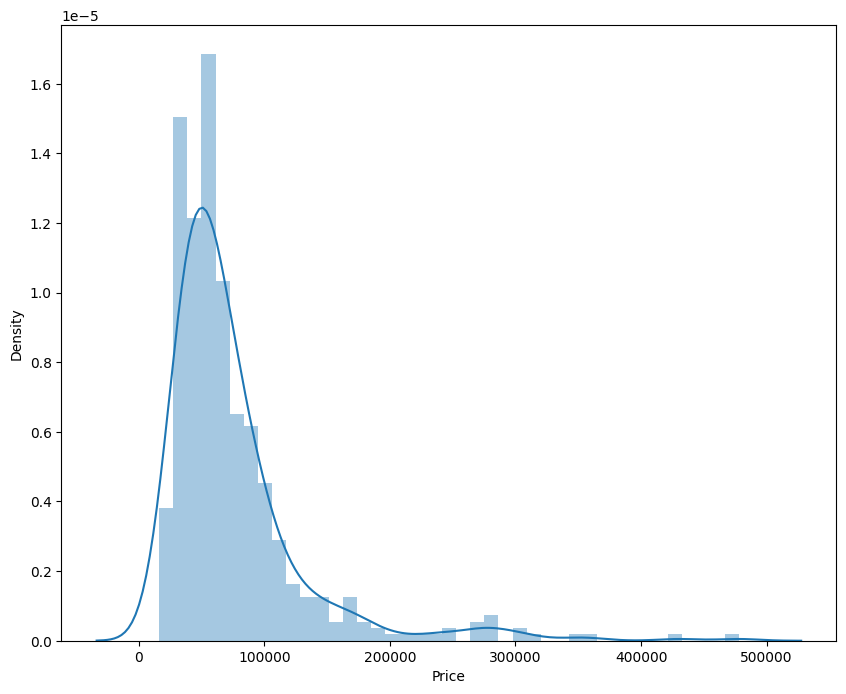

In [55]:
plt.figure(figsize=(10,8))
sns.distplot(data['Price'])

In [56]:
df1 = data
df1['Name'] = df1['Name'].str.split().str[:4].str.join(' ')
df1.head()

,Name,Price,Processor,Ram,OS,storage,Display,warrenty
0,ASUS Vivobook 15 Core,29990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,39.62 cm (15.6 Inch) Display,Not Applicable
1,APPLE 2022 MacBook AIR,94990,Apple M2 Processor,8 GB Unified Memory RAM,Mac OS Operating System,256 GB SSD,34.54 cm (13.6 Inch) Display,"Built-in Apps: iMovie, Siri, GarageBand, Pages..."
2,DELL Inspiron Core i3,36590,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty
3,HP 2023 Ryzen 3,34990,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,1 Year Onsite Warranty
4,Acer One Core i3,25990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,35.56 cm (14 Inch) Display,1 Year Warranty


Text(0.5, 1.0, 'Scatterplot of Laptop Prices')

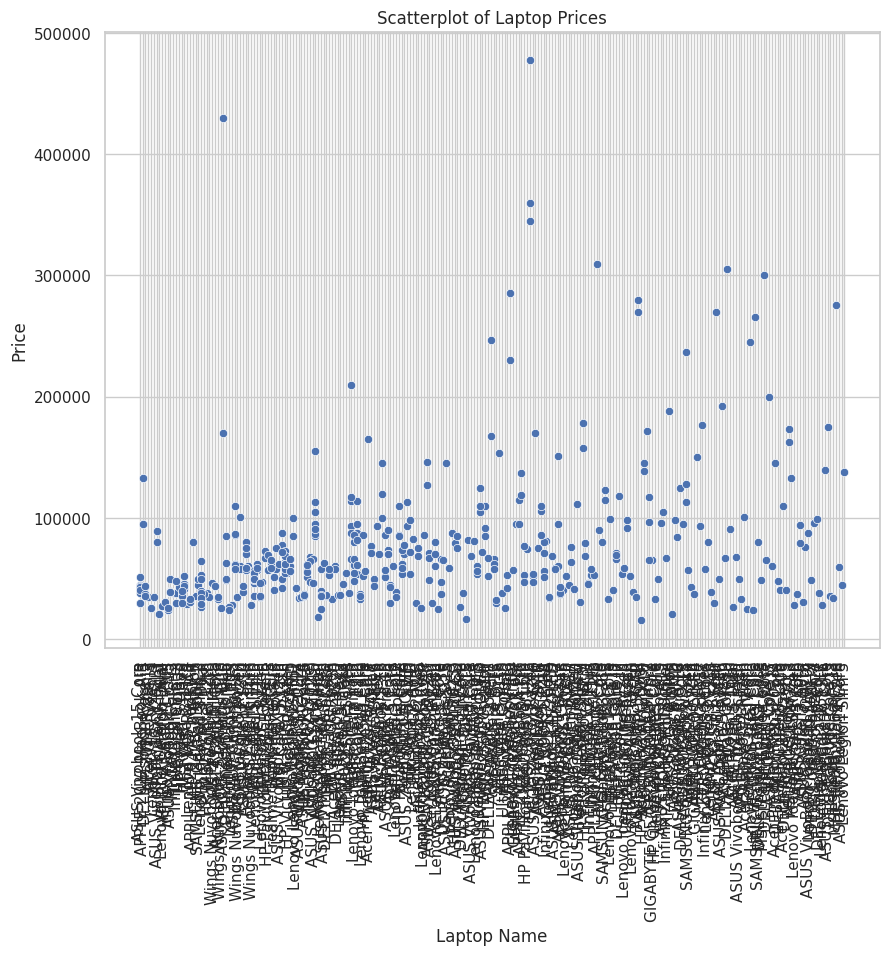

In [57]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(x='Name', y="Price", data=df1)
plt.xticks(rotation=90)
plt.xlabel("Laptop Name")
plt.ylabel("Price")
plt.title("Scatterplot of Laptop Prices")

Text(0.5, 1.0, 'Scatterplot of Laptop Prices')

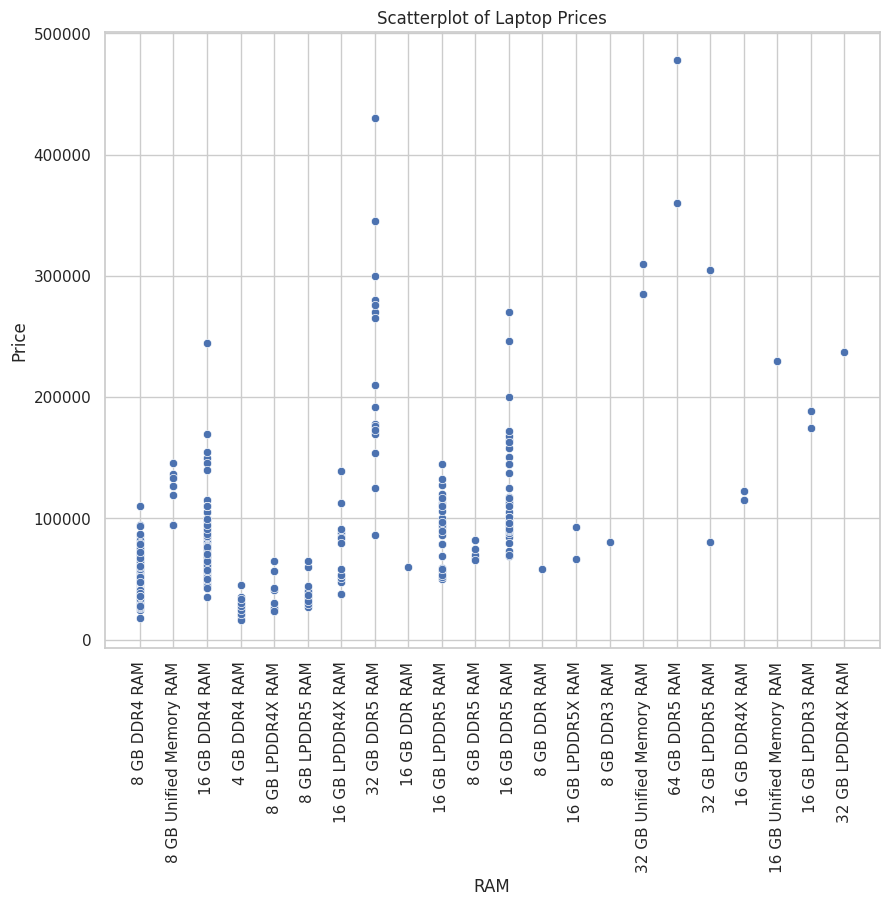

In [58]:
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(x='Ram', y="Price", data=data)
plt.xticks(rotation=90)
plt.xlabel("RAM")
plt.ylabel("Price")
plt.title("Scatterplot of Laptop Prices")

Text(0.5, 1.0, 'countplot on RAM')

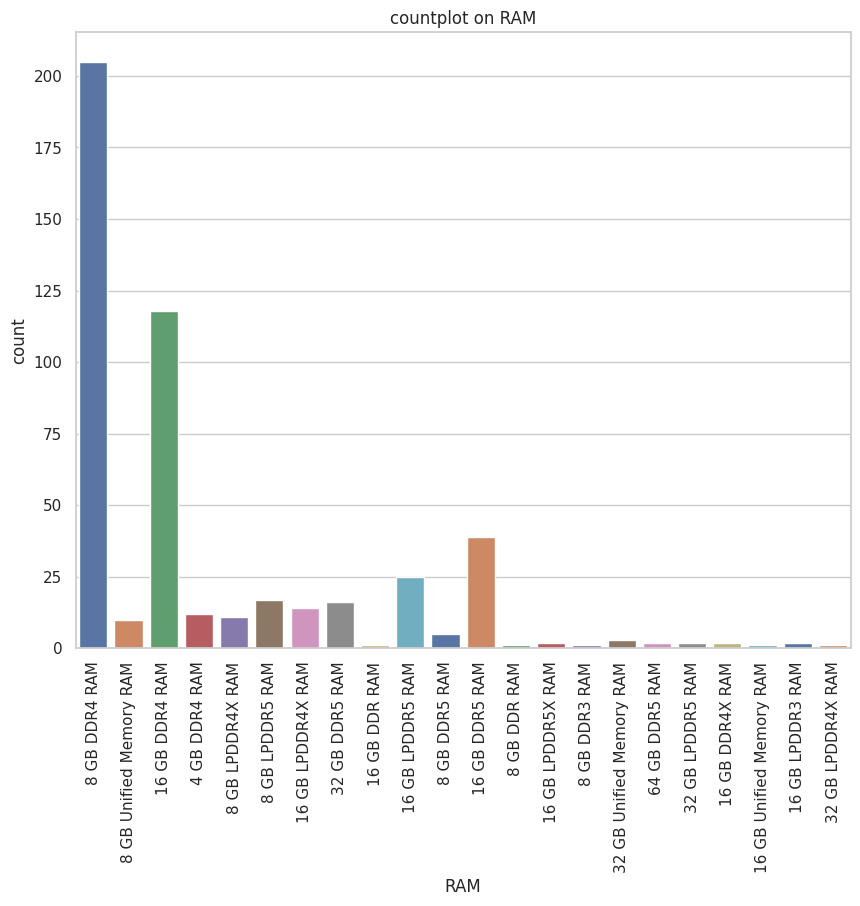

In [59]:
pal = sns.color_palette()
plt.figure(figsize=(10, 8))
countplot = sns.countplot(x='Ram', data=data, palette=pal)
plt.xticks(rotation=90)
plt.xlabel("RAM")
plt.title("countplot on RAM")

Text(0.5, 1.0, 'Scatterplot of Laptop Prices')

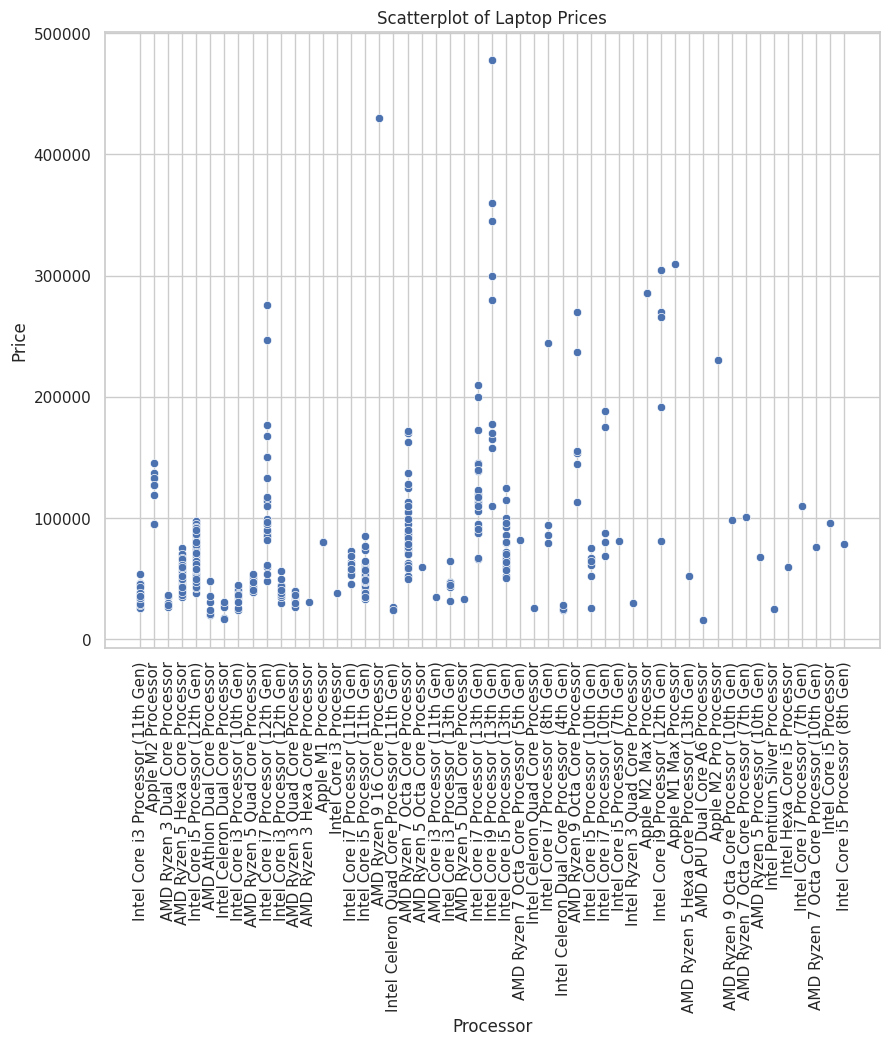

In [60]:
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(x='Processor', y="Price", data=data)
plt.xticks(rotation=90)
plt.xlabel("Processor")
plt.ylabel("Price")
plt.title("Scatterplot of Laptop Prices")

Text(0.5, 1.0, 'countplot on Processor')

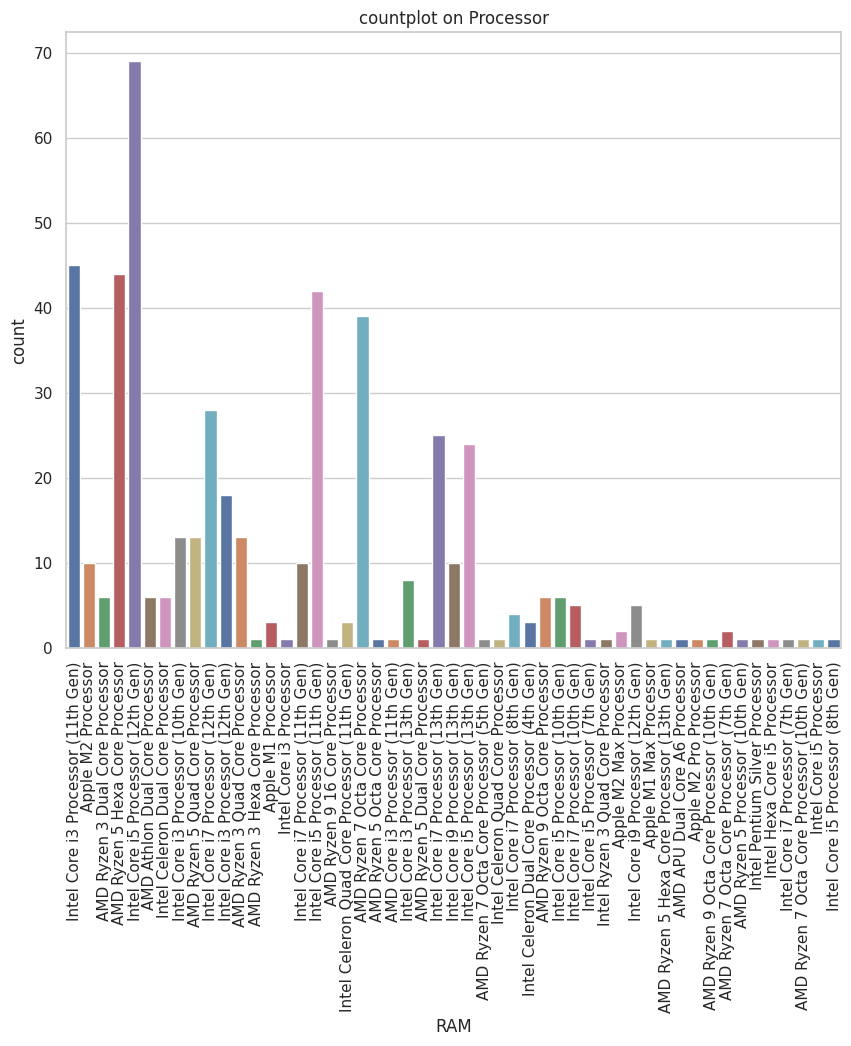

In [61]:
pal = sns.color_palette()
plt.figure(figsize=(10, 8))
countplot = sns.countplot(x='Processor', data=data, palette=pal)
plt.xticks(rotation=90)
plt.xlabel("RAM")
plt.title("countplot on Processor")

Text(0.5, 1.0, 'Scatterplot of Laptop Prices')

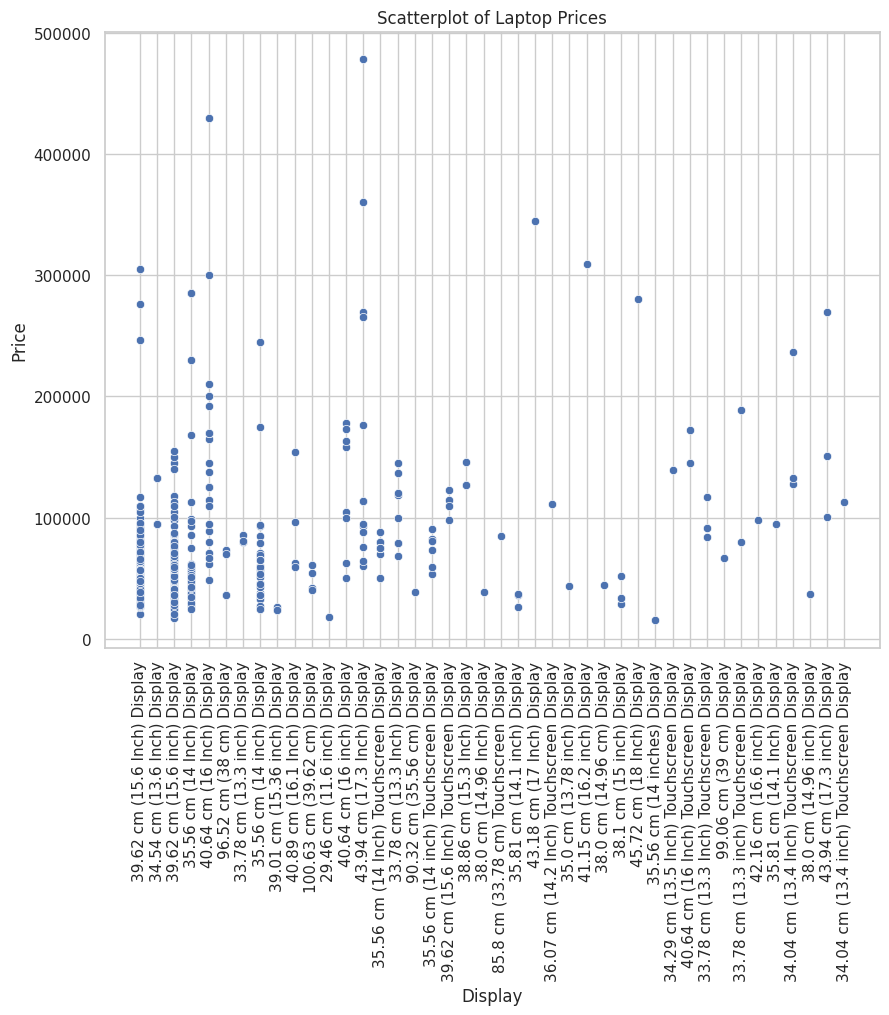

In [62]:
plt.figure(figsize=(10, 8))
scatterplot = sns.scatterplot(x='Display', y="Price", data=data)
plt.xticks(rotation=90)
plt.xlabel("Display")
plt.ylabel("Price")
plt.title("Scatterplot of Laptop Prices")

Text(0.5, 1.0, 'countplot on Display')

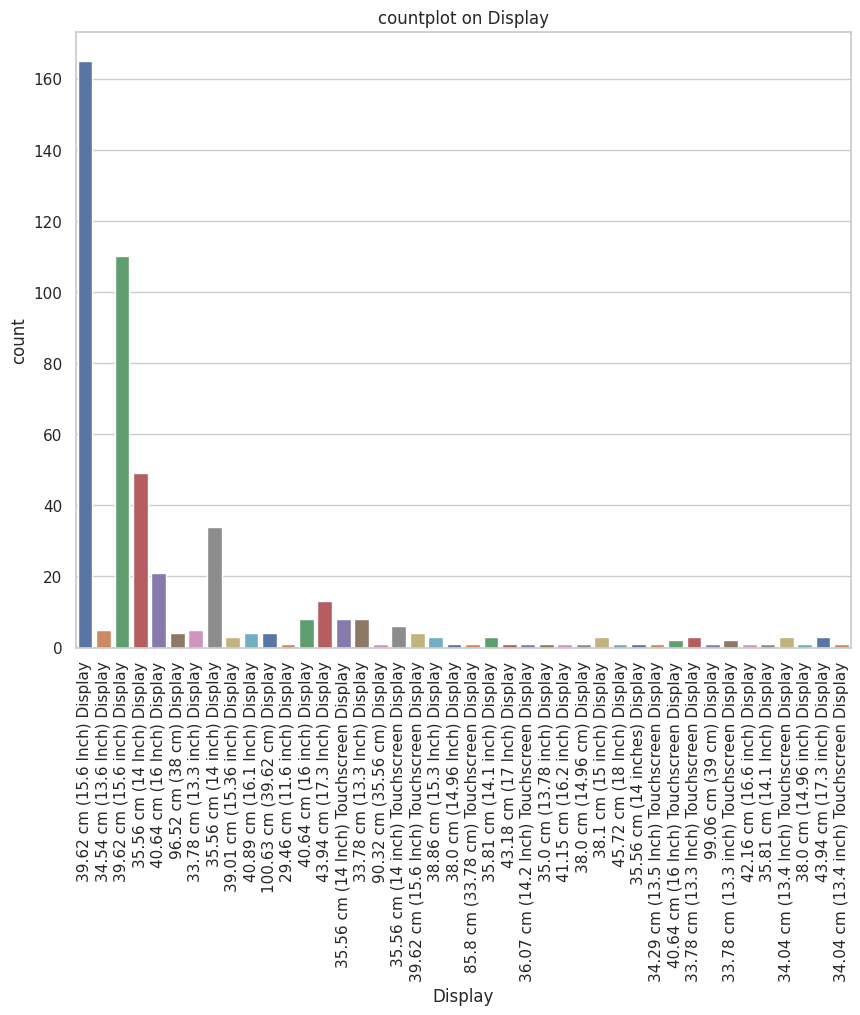

In [63]:
pal = sns.color_palette()
plt.figure(figsize=(10, 8))
countplot = sns.countplot(x='Display', data=data, palette=pal)
plt.xticks(rotation=90)
plt.xlabel("Display")
plt.title("countplot on Display")